<a href="https://colab.research.google.com/github/dacasfilipe/Python_data_science/blob/main/TOPICO2_CDIA_MDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

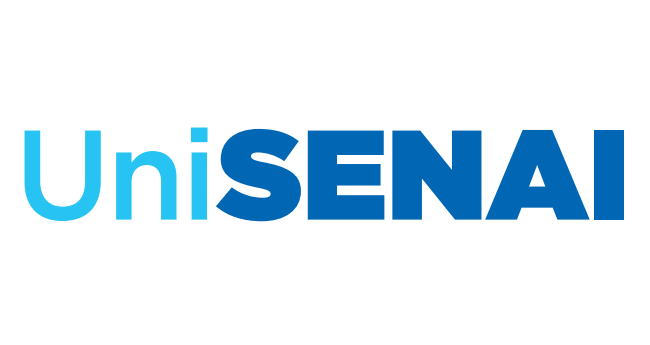
<h1> Pós-Graduação em Ciência de Dados e Inteligência Artificial </h1>

<h1>Unidade Curricular: Modelagem e Armazenamento de Dados</h1>
<h1>Professores: Gustavo Stangherlin Cantarelli, Me. e Paulo Roberto Pasqualotti, Me.</h1>


#3 - MySQL no Colaboratory

## Para instalar o MySQL no Colaboratory, execute os códigos seguintes:

In [1]:
# ********** 1 - Instalação do MySQL **********
!apt install mysql-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl
  libfcgi-bin libfcgi-perl libfcgi0ldbl libhtml-parser-perl
  libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2
  libprotobuf-lite23 liburi-perl mecab-ipadic mecab-ipadic-utf8 mecab-utils
  mysql-client-8.0 mysql-client-core-8.0 mysql-server-8.0
  mysql-server-core-8.0
Suggested packages:
  libdata-dump-perl libipc-sharedcache-perl libbusiness-isbn-perl libwww-perl
  mailx tinyca
The following NEW packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl
  libfcgi-bin libfcgi-perl libfcgi0ldbl libhtml-parser-perl
  libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2
  lib

In [2]:
# ********** 2 - Inicialização do serviço **********
!service mysql start

 * Starting MySQL database server mysqld
su: warning: cannot change directory to /nonexistent: No such file or directory
   ...done.


In [3]:
# ********** 3 - Alteração do password **********
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY '!Qwerty1234'"

In [4]:
# ********** 4 - Instalação do Connector **********
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 30.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.


In [5]:
# ********** 5 - Definição do Connector **********
import mysql.connector as mysql
from mysql.connector import Error
import pandas as pd
import psycopg2
import sys
import time
import requests
from io import BytesIO

myconn = mysql.connect(host='localhost', user='root', password='!Qwerty1234')
mycur = myconn.cursor()

# ********** Função para consultas no banco  **********
def consulta_db(sql):
    mycur.execute(sql)
    recset = mycur.fetchall()
    registros = []
    for rec in recset:
      registros.append(rec)
    return registros

In [6]:
mycur.execute('CREATE DATABASE teste1')

In [7]:
sql="""CREATE TABLE teste1.aluno(
  id_aluno int not null auto_increment primary key,
  nome varchar(60),
  sexo varchar(1)
)"""
mycur.execute(sql)


In [8]:
sql="""INSERT INTO teste1.aluno (nome, sexo) values
('Carlos','M'), ('Marina','F'), ('Alex','M')
"""
mycur.execute(sql)

In [9]:
sql="SELECT nome from teste1.aluno"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['nome'])
df_bd.head()

,nome
0,Carlos
1,Marina
2,Alex


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['nome'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['index', 'nome'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_4, *['index', 'count()', 'nome'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_7, *['nome'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_8, *['index', 'nome'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['index', 'count()', 'nome'], **{})
chart

## Outros comandos

In [ ]:
# ********** Se o passo 3 falhar **********
!mysql_secure_installation

In [ ]:
# ********** Se precisar remover **********
!apt-get remove mysql-server


# 4 - Linguagem SQL

## 4.1 - Conceitos



<p>A Structure Query Language (SQL) é uma linguagem para consultas em bancos de dados relacionais. </p>

<p>Foi originalmente desenvolvida na década de 1970 nos laboratórios da IBM, nos projetos “SEQUEL-XRM” e “System-R”, que tinha por objetivo a demonstração da viabilidade da implementação do modelo relacional proposto por Edgar Frank Codd. </p>

> <p>Seu principal propósito é a definição e a manipulação dos dados armazenados em banco de dados sem que necessite nossa preocupação com detalhes mais internos, como por exemplo, a forma como os dados são armazenados e organizados internamente.</p>

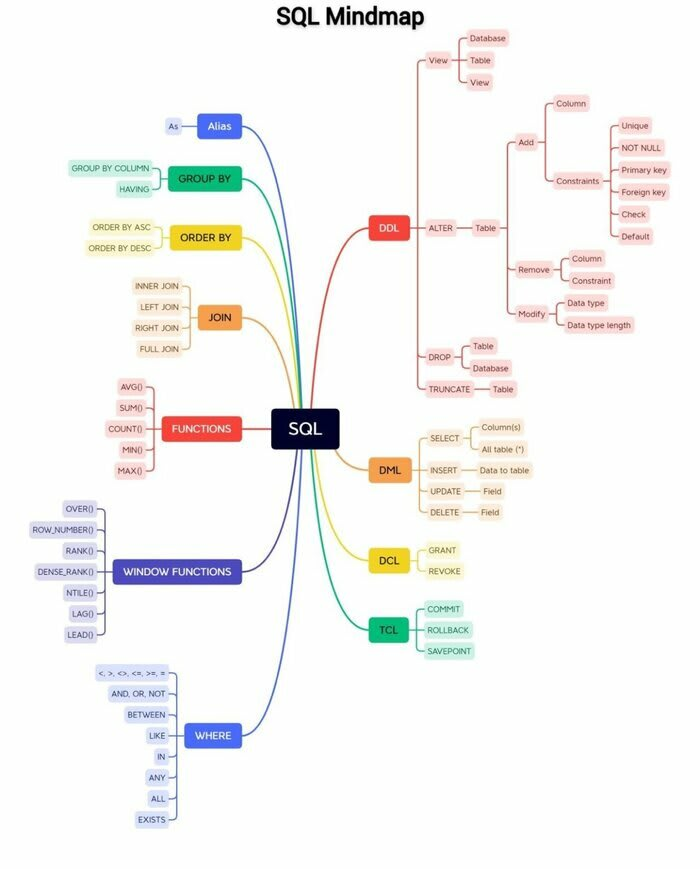
Fonte: [dev.to](https://dev.to/jojosuelobo/desbravando-os-segredos-do-sql-um-guia-completo-para-dominar-a-linguagem-de-bancos-de-dados-17hb)

## 4.2 - DDL (create, alter e drop)

A DDL é usada para definir a estrutura ou esquema do banco de dados. A DDL também é usada para especificar propriedades adicionais dos dados.
Principais comandos da DDL:
* CREATE : cria objetos no banco de dados
* ALTER : altera objetos do banco de dados
* DROP : remove objetos do banco de dados

###4.2.1 - Tipos de Dados

Antes de conhecermos os comandos estruturais, é fundamental conhecermos os principais tipos de dados usados pelos SGBDs.

* Inteiros (**int**, **smallint** e **bigint**): Suportam valores numéricos inteiros com sinal.

* Decimais (**decimal(t,p)**): São utilizados para armazenar valores do tipo fracionário. Muito importante quando é necessário precisão no retorno dos dados. O tamanho **t** (número total de dígitos) e a precisão **p** (número de casas decimais) devem ser informados.

* Ponto Flutuante (**float**): São amplamente usados nas linguagens de programação. No entanto, como os valores de ponto flutuante são aproximados e não armazenados como valores exatos, as tentativas de tratá-los como exatos em comparação podem causar problemas.

* Literais (**char(n)** e **varchar(n)**): Usados para o armazenamento de strings. A principal diferença entre os dois tipos é que o tipo char é fixo, ou seja, a string sempre á preenchida com espaços à esquerda até atingir o tamanho. Já o tipo varchar pode não atingir o tamanho máximo.

* Temporais (**date**, **time**, **datetime**): São usados para armazenar dados de hora, data ou ambos.

###4.2.2 - Create

É usado para definir incluir  estruturas em nosso banco de dados, tais como: banco de dados (database), tabelas (table), visões (view), funções (function), automatismos (trigger), entre outros.
Para criarmos nossas estruturas, utilizaremos as seguintes sintaxes básicas:

Para criar um banco de dados:<br>
> **create database** nome_do_bd;

Para criar tabela:<br>
> **create table** nome_da_tabela(<br>
nome_campo1 tipo_campo1,<br>
nome_campo2 tipo_campo2,<br>
nome_campoN tipo_campoN<br>
);<br>


Para criar tabela com chave primária simples:<br>
> **create table** nome_da_tabela(<br>
nome_campo1 tipo_campo1 **not null primary key**,<br>
nome_campo2 tipo_campo2,<br>
nome_campoN tipo_campoN<br>
);<br>

Para criar tabela com chave primária composta:<br>
> **create table** nome_da_tabela(<br>
nome_campo1 tipo_campo1 **not null**,<br>
nome_campo2 tipo_campo2 **not null**,<br>
nome_campoN tipo_campoN,
**primary key**(nome_campo1,nome_campo2)<br>
);<br>

Para criar tabela com chave primária sequencial:<br>
> **create table** nome_da_tabela(<br>
nome_campo1 **int** **not null auto_increment primary key**,<br>
nome_campo2 tipo_campo2,<br>
nome_campoN tipo_campoN<br>
);<br>

Para criar tabela com chave estrangeira:<br>
> **create table** nome_da_tabela(<br>
nome_campo1 tipo_campo1 **not null primary key**,<br>
nome_campo2 tipo_campo2,<br>
nome_campoFK tipo_campo3,<br>
**foreign key** (nome_campoFK) **references** nome_tabela_estrangeira (nome_campoPK) **on update cascade on delete** restrict
);<br>





Exemplo:


> create table produtos(<br>
id_produto int not null auto_increment primary key,<br>
nome varchar(60),<br>
preco_venda decimal(15,2),<br>
quantidade_estoque decimal(15,2),<br>
fk_id_marca int not null,<br>
foreign key (fk_id_marca) references marcas (id_marca) on update cascade on delete restrict<br>
);




In [10]:
mycur.execute('CREATE DATABASE geo')

In [18]:
mycur.execute('DROP TABLE IF EXISTS `geo.regiao`')

ProgrammingError: ignored

In [19]:
sql="""CREATE TABLE geo.regiao (
  id int NOT NULL,
  nome varchar(15) NOT NULL,
  PRIMARY KEY (`id`)
) """
mycur.execute(sql)

ProgrammingError: ignored

In [20]:
sql="SELECT id,nome from geo.regiao"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id','nome'])
df_bd.head()

,id,nome


In [21]:
sql="""CREATE TABLE geo.estado (
  id_estado int NOT NULL auto_increment PRIMARY KEY,
  nome varchar(75),
  uf varchar(5),
  fk_id_regiao int,
  FOREIGN KEY (fk_id_regiao) references regiao (id) on update cascade on delete restrict
)"""
mycur.execute(sql)

In [22]:
sql="SELECT id_estado,nome,uf,fk_id_regiao from geo.estado"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id','nome','uf','fk_id_regiao'])
df_bd.head()

,id,nome,uf,fk_id_regiao


####4.2.2.1 - Regras de Integridade

As regras de integridade são acionadas automaticamente em 2 eventos:
*   ON UPDATE: Dispara sempre que houver modificações na chave primária referenciada, atuando na estrangeira correspondente, executando uma regra definida.
*   ON DELETE: Dispara sempre que houver exclusões na tabela dependente, executando uma regra definida.

Regras mais utilizadas:

*   SET NULL: Atribui nulo na chave estrangeira.
*   CASCADE: Exclui todos os registros que possuem como chave estrangeira o mesmo valor da chave primária da tabela referenciada.
*   RESTRICT: Evita que o registro da tabela referenciada seja excluído caso haja registros que o referenciam.

###4.2.3 - Alter

O comando ALTER permite alterar as estruturas do banco de dados.

Para incluir um novo atributo em uma tabela existente:<br>
> **alter table** nome_da_tabela<br>
**add** nome_campoB tipo_campoB ;<br>


Para criar uma chave estrangeira em uma tabela existente:<br>
> **alter table** nome_da_tabela<br>
**add foreign key** (nome_campoFK) **references** nome_tabela_estrangeira (nome_campoPK) **on update cascade on delete** restrict;<br>

Para alterar o valor do incremento de uma tabela já criada:<br>
> **alter table** nome_da_tabela **auto_increment** = novo_valor_inteiro;

Exemplos:

> alter table clientes add fk_id_profissao int not null;

> alter table clientes add foreign key (fk_id_profissao) references profissoes (id_profissao) on update cascade on delete restrict;



In [23]:
sql="""ALTER TABLE geo.regiao add area decimal(15,2)"""
mycur.execute(sql)

In [24]:
sql="SELECT id,nome,area from geo.regiao"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_regiao','nome','area'])
df_bd.head()

,id_regiao,nome,area


In [25]:
sql="""ALTER TABLE geo.estado add populacao decimal(15,2)"""
mycur.execute(sql)

In [26]:
sql="SELECT id_estado,nome,uf,fk_id_regiao,populacao from geo.estado"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_regiao','nome','uf','fk_id_regiao','populacao'])
df_bd.head()

,id_regiao,nome,uf,fk_id_regiao,populacao


###4.2.4 - Drop

O comando DROP permite eliminar estruturas do banco de dados, tais como: databases, tabelas, chaves primárias, chaves estrangeiras, entre outras. Lembrando que o comando DROP somente permitirá a remoção de uma tabela caso não existam constraints (tipo chave) dependentes. Caso não tenha sucesso com o DROP, use o comando ALTER para remover as constraints.

Exemplo:
drop table emails;

## 4.3 - DML

A linguagem DML é a responsável pela manipulação de dados em um banco de dados por meio dos comandos INSERT, UPDATE e DELETE. <br>



### 4.3.1 - Insert

Este comando permite adicionar um ou vários registros a uma tabela do BD.  

Para inserir uma linha na tabela:

> **Insert into** nome_tabela(coluna1, coluna2, coluna3,...,colunaN)<br>
**values** (valor1,valor2, valor3, ..., valorN);

Para inserir várias linhas na tabela:

> **Insert into** nome_tabela(coluna1, coluna2, coluna3,...,colunaN)<br>
**values** (valor1a,valor2a, valor3a, ..., valorNa),<br>
(valor1b,valor2b, valor3b, ..., valorNb),<br>
(valor1c,valor2c, valor3c, ..., valorNc),<br>
(valor1d,valor2d, valor3d, ..., valorNd);



Exemplo:

INSERT INTO regiao (nome) VALUES <br>
('Sudeste'),<br>
('Nordeste'),<br>
('Sul'),<br>
('Norte'),<br>
('Centro-Oeste');

In [37]:
data = [
    (1, 'Sudeste'),
    (2, 'Nordeste'),
    (3, 'Sul'),
    (4, 'Norte'),
    (5, 'Centro-Oeste')
]

sql = "INSERT INTO geo.regiao (id, nome) VALUES (%s, %s)"

mycur.executemany(sql, data)




In [38]:
sql="SELECT id,nome from geo.regiao"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_regiao','nome'])
df_bd.head()

,id_regiao,nome
0,1,Sudeste
1,2,Nordeste
2,3,Sul
3,4,Norte
4,5,Centro-Oeste


In [39]:
sql="""INSERT INTO geo.estado (id_estado, nome, uf) VALUES
(1, 'Acre', 'AC'),
(2, 'Alagoas', 'AL'),
(3, 'Amazonas', 'AM'),
(4, 'Amapá', 'AP'),
(5, 'Bahia', 'BA');
"""
mycur.execute(sql)

In [41]:
sql="SELECT id_estado,nome,uf,fk_id_regiao from geo.estado"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id','nome','uf','fk_id_regiao'])
df_bd.head()

,id,nome,uf,fk_id_regiao
0,1,Acre,AC,None
1,2,Alagoas,AL,None
2,3,Amazonas,AM,None
3,4,Amapá,AP,None
4,5,Bahia,BA,None


### 4.3.2 - Operadores

#### 4.3.2.1 - Relacionais

Os operadores relacionais podem comparar valores em colunas, literais, expressões aritméticas ou funções. São eles:

> <p><b> > </b>	maior</p>
> <p><b> >=</b>	menor</p>
> <p><b> < </b>	maior ou igual</p>
> <p><b> <=</b>	menor ou igual</p>
> <p><b> = </b>	igual</p>
> <p><b> <></b> ou <b> !=</b>	diferente</p>



#### 4.3.2.2 - Lógicos

São operadores para valores booleanos apenas, ou seja, o resultado da expressão (que faz uso de operador relacional) será verdadeiro(“true” ou “1”) ou falso (“false” ou “0”).


> <p><b>AND</b>	e	</p>
><p>((ano>=2019) AND (ano<=2023)), nesse caso se o resultado da expressão da esquerda for verdadeiro e o resultado da expressão da direita TAMBÉM for verdadeiro, o resultado será verdadeiro.</p>

> <p><b>OR</b>	ou	</p>
><p>((cor=’branca’) OR (marca!=’Xyz’)), nesse caso se o resultado da expressão da esquerda for verdadeiro ou o resultado da expressão da direita for verdadeiro, o resultado será verdadeiro. Basta apenas o resultado de 1 expressão verdadeira para resultar em verdadeiro.</p>

> <p><b>NOT</b>	não</p>É a negação de uma expressão lógica.
><p>No exemplo: ((cor=’branca’) OR (marca!=’Xyz’)), vamos negar o resultado. Assim temos: NOT (((cor=’branca’) OR (marca!=’Xyz’))). Se o resultado da expressão interna ao NOT for verdadeiro, irá retornar falso e vice e versa.</p>


#### 4.3.2.3 - Aritméticos

São os operadores de operações matemáticas básicas:

> <p><b> +</b>	Adição</p>
> <p><b> -</b>	Subtração</p>
> <p><b> *</b>	Multiplicação</p>
> <p><b> /</b>	Divisão</p>


### 4.3.3 - Update

Quando precisamos fazer qualquer alteração nos dados existentes na tabela, usamos o comando UPDATE. Ele pode ser executado com ou sem o predicado WHERE. <br>

**IMPORTANTE**: Se deseja atualizar um grupo de registros ou um registro, deverá ser feito o uso do predicado WHERE. Caso contrário todos os registros da tabela serão atualizados.

> **update** nome_tabela<br>
**set** nome_campo1 = valor1,<br>
nome_campo2 = valor2,<br>
nome_campo3 = valor3,<br>
nome_campoN = valorN<br>
**where** condição;

Exemplo:
>update regiao<br>
set area=7000<br>
where id_regiao=2;

In [ ]:
sql="""update geo.regiao set area=7000 where id_regiao=2
"""
mycur.execute(sql)

In [ ]:
sql="SELECT id_regiao,nome,area from geo.regiao"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_regiao','nome','area'])
df_bd.head()

In [ ]:
sql="""UPDATE geo.estado SET fk_id_regiao = 4 WHERE id_estado in (1,3,4,14,21,22);
"""
mycur.execute(sql)

In [ ]:
sql="SELECT id_estado,nome,uf,fk_id_regiao from geo.estado"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_regiao','nome','uf','fk_id_regiao'])
df_bd.head()

In [ ]:
sql="""UPDATE geo.estado SET populacao = 100000 * (FLOOR(1+RAND()*(100-1)));
"""
mycur.execute(sql)

In [ ]:
sql="SELECT id_estado,nome,uf,fk_id_regiao,populacao from geo.estado"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_regiao','nome','uf','fk_id_regiao','populacao'])
df_bd.head()

A função RAND() no MySQL é usada para retornar um valor de ponto flutuante aleatório V, no intervalo (0 <= V < 1) .
Se quisermos obter um inteiro aleatório R no intervalo (i <= R < j), temos que usar a expressão:
> FLOOR (i + RAND() * (j - i)).

### 4.3.3 - Delete

Quando precisamos excluir registros existentes na tabela, usamos o comando DELETE. Ele pode ser executado com ou sem o predicado WHERE. <br>

**IMPORTANTE**: Se deseja atualizar um grupo de registros ou um registro, deverá ser feito o uso do predicado WHERE. Caso contrário todos os registros da tabela serão excluídos.

> **delete** **from** nome_tabela<br>
**where** condicao;

Exemplo:

> **delete** **from** regiao<br>
**where** area=20000;


In [ ]:
sql="""delete from geo.regiao where area=20000
"""
mycur.execute(sql)

In [ ]:
sql="SELECT id_regiao,nome,area from geo.regiao"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_regiao','nome','area'])
df_bd.head()

## 4.4 - DQL

A DQL (Data Query Language) refere-se exclusivamente ao comando SELECT. Com ele efetuamos consultas (esta operação também é chamada de recuperação) aos dados contidos nas tabelas do BD.<br>
O comando SELECT pode ser executado sem condições, junções ou agregações, bastando a sintaxe:

> **select** * **from** nome_tabela;

<p>IMPORTANTE: O <b>*</b> representa todos os campos da tabela (para BDs com grande volumes de dados não é uma boa prática usá-lo).</p>


###4.4.1 - Aliases (apelidos)

É bastante comum utilizarmos mais de 1 tabela em consultas. Para simplificar o uso, a visibilidade dos atributos e referências corretas dos campos, primeiramente apelidamos as tabelas.

Tabelas:
> **select** r.nome, r.area<br>
**from** regiao r;

Campos:
> **select** r.nome NOME_REGIAO, r.area AREA_TOTAL<br>
**from** regiao r;

In [ ]:
sql="SELECT r.nome, r.area from geo.regiao r"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['nome','area'])
df_bd.head()

,nome,area
0,Sudeste,None
1,Nordeste,None
2,Sul,None
3,Norte,None
4,Centro-Oeste,None


In [ ]:
sql="SELECT r.nome NOME_REGIAO, r.area AREA_TOTAL from geo.regiao r"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['NOME_REGIAO','AREA_TOTAL'])
df_bd.head()

,NOME_REGIAO,AREA_TOTAL
0,Sudeste,None
1,Nordeste,None
2,Sul,None
3,Norte,None
4,Centro-Oeste,None


###4.4.1 - Condição

Para filtrarmos o resultado de uma consulta, usamos o predicado WHERE, juntamente com operadores relacionais e/ou lógicos. Sempre aparece após o FROM (ou após o JOIN, caso a consulta possua).<br>
Exemplo:
> **select** r.id_regiao,r.nome, r.area<br>
**from** regiao r<br>
**where** r.nome='Sul';


In [ ]:
sql="SELECT r.id_regiao, r.nome, r.area from geo.regiao r where r.nome='Sul'"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_regiao','nome','area'])
df_bd.head()

###4.4.2 - Like

Para as consultas não exatas, em campos literais, usamos o **like**.<br> Podemos usá-lo de 4 formas:

a) Começando com:
> **select** r.id_regiao,r.nome, r.area<br>
**from** regiao r<br>
**where** r.nome **like** 'No%';

b) Contendo:
> **select** r.id_regiao,r.nome, r.area<br>
**from** regiao r<br>
**where** r.nome **like** '%u%';

c) Terminando com:

> **select** r.id_regiao,r.nome, r.area<br>
**from** regiao r<br>
**where** r.nome **like** '%te';

d) Igualdade:
> **select** r.id_regiao,r.nome, r.area<br>
**from** regiao r<br>
**where** r.nome **like** 'Sul';


In [ ]:
sql="SELECT r.id_regiao, r.nome, r.area from geo.regiao r where r.nome like 'No%'"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_regiao','nome','area'])
df_bd.head()

In [ ]:
sql="SELECT r.id_regiao, r.nome, r.area from geo.regiao r where r.nome like '%te'"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_regiao','nome','area'])
df_bd.head()

In [ ]:
sql="SELECT r.id_regiao, r.nome, r.area from geo.regiao r where r.nome like 'No%'"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_regiao','nome','area'])
df_bd.head()

,id_regiao,nome,area
0,2,Nordeste,None
1,4,Norte,None
2,7,Nordeste,None
3,9,Norte,None
4,12,Nordeste,None


In [ ]:
sql="SELECT r.id_regiao, r.nome, r.area from geo.regiao r where r.nome like 'Sul'"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_regiao','nome','area'])
df_bd.head()

,id_regiao,nome,area
0,3,Sul,None
1,8,Sul,None
2,13,Sul,None


###4.4.3 - Between

Quando precisamos consultar dentro de um intervalo numérico ou de tempo, podemos usar o **between**.

Exemplo:
> **select** r.id_regiao,r.nome, r.area<br>
**from** regiao r<br>
**where** r.area **between** 70000 **and** 90000;

In [ ]:
sql="SELECT r.id_regiao, r.nome, r.area from geo.regiao r where r.area between 70000 and 90000"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_regiao','nome','area'])
df_bd.head()

,id_regiao,nome,area


###4.4.4 - Join

O operador de junção serve para acessarmos os dados de outras tabelas. Para seu uso, vamos definir que o lado esquerdo da igualdade será um campo do tipo FK e o lado direito uma PK (campo_FK = campo_PK).

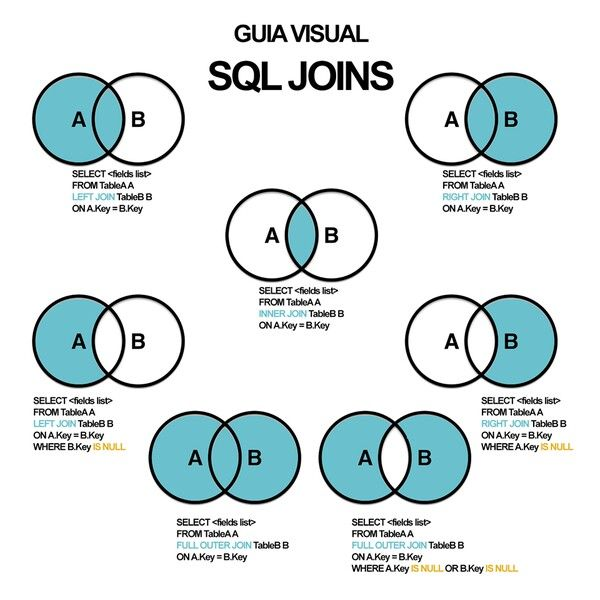

Fonte: [stevenjhu.com](https://stevenjhu.com/wp-content/uploads/2020/01/sql-join-all.jpg)

####4.4.4.1 - Inner join

A junção interna (**inner join**) (pode ser usado **join** somente) é responsável por comparar e retornar os campos cuja condição de igualdade é verdadeira. Ou seja, somente serão mostradas as linhas que atenderem a igualdade.
> **select** e.nome ESTADO, r.nome REGIAO<br>
**from** estado e<br>
**inner join** regiao r **on** e.fkid_regiao = r.id_regiao;

In [ ]:
sql="select e.nome ESTADO, r.nome REGIAO from geo.estado e inner join geo.regiao r on e.fk_id_regiao = r.id_regiao"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['ESTADO','REGIAO'])
df_bd.head()

,ESTADO,REGIAO
0,Acre,Norte
1,Alagoas,Nordeste
2,Amazonas,Norte
3,Amapá,Norte
4,Bahia,Nordeste


####4.4.4.2 - Left join

A junção interna pela esquerda (**left join**)  é responsável por comparar e retornar os campos cuja condição de igualdade é verdadeira, priorizando os valores do campo à esquerda da igualdade. Se existirem linhas da tabela com valores nulo para tal campo, serão mostradas também.
> **select** e.nome ESTADO, r.nome REGIAO<br>
**from** estado e<br>
**left join** regiao r **on** e.fkid_regiao = r.id_regiao;

In [ ]:
sql="select e.nome ESTADO, r.nome REGIAO from geo.estado e left join geo.regiao r on e.fk_id_regiao = r.id_regiao"
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['ESTADO','REGIAO'])
df_bd.head()

,ESTADO,REGIAO
0,Acre,Norte
1,Alagoas,Nordeste
2,Amazonas,Norte
3,Amapá,Norte
4,Bahia,Nordeste


###4.4.5 - In

'Quando precisamos consultar dentro de um conjunto, usamos o IN.
Dica: Ao usar o operador IN, certifique-se que os tipos de dados são os mesmos.

Exemplo: inteiro com inteiro, varchar com varchar, etc.

a) Conjunto definido: os valores são conhecidos e especificados no in.
> **select** e.id_estado, e.nome<br>
**from** estado e<br>
**inner join** regiao r **on** e.fkid_regiao = r.id_regiao<br>
**where** r.nome **in** ('Sul','Sudeste');


b) Conjunto indefinido: não se conhece os possíveis valores, logo um novo select é especificado no in.
> **select** e.id_estado, e.nome<br>
**from** estado e<br>
**where** e.fkid_regiao **in** (**select** **distinct** r.id_regiao<br>
**from** regiao r<br>
**where** r.nome **like** '%u%');

ATENÇÃO:


*   Somente poderão der comparados mesmos tipos de dados.
*   O operador **distinct** é usado para evitar linhas repetidas.
*   Só podemos comparar 1 atributo, logo na subconsulta, o SELECT deverá retornar valores de 1 campo apenas. Entretanto poderá retornar várias linhas.





In [ ]:
sql="""select e.id_estado, e.nome
from geo.estado e
inner join geo.regiao r on e.fk_id_regiao = r.id_regiao
where r.nome in ('Sul','Sudeste')
"""
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_estado','nome'])
df_bd.head()

,id_estado,nome
0,8,Espírito Santo
1,11,Minas Gerais
2,19,Rio de Janeiro
3,26,São Paulo
4,18,Paraná


In [ ]:
sql="""select e.id_estado, e.nome
from geo.estado e
where e.fk_id_regiao in (select distinct r.id_regiao
from geo.regiao r
where r.nome like '%ul%');
"""
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_estado','nome'])
df_bd.head()

,id_estado,nome
0,18,Paraná
1,23,Rio Grande do Sul
2,24,Santa Catarina


###4.4.6 - Order by

A ordenação padrão dos resultados das consultas é crescente de acordo com o campo PK. Entretanto podemos alterar o campo a ser ordenado usando o comando **order by** que deve ser o último comando da consulta.
> Crescente: **order by** nome_campo **asc**

>Decrescente: **order by** nome_campo **desc**

In [ ]:
sql="""select e.id_estado, e.nome
from geo.estado e
order by e.nome asc;
"""
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_estado','nome'])
df_bd.head()

,id_estado,nome
0,1,Acre
1,2,Alagoas
2,4,Amapá
3,3,Amazonas
4,5,Bahia


In [ ]:
sql="""select e.id_estado, e.nome
from geo.estado e
order by e.nome desc;
"""
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_estado','nome'])
df_bd.head()

,id_estado,nome
0,27,Tocantins
1,25,Sergipe
2,26,São Paulo
3,24,Santa Catarina
4,22,Roraima


###4.4.7 - Agrupamentos

####4.4.7.1 - Funções de agregação

As funções de agregação da linguagem SQL permitem que um conjunto de linhas sejam agrupadas em uma única linha.
As funções de agregação podem otimizar a performance do sistema pois reduzem o número de linhas retornadas diminuindo o tráfego de rede.
Principais funções de agregação:

*   **max**() – Máximo valor de uma expressão ou campo.
*   **min**()  – Mínimo valor de uma expressão ou campo.
*   **sum**() – Somatório dos valores de uma expressão ou campo.
*   **avg**() – Média aritmética dos valores de uma expressão ou campo.
*   **count**() – Contagem de registros.

Exemplo:
> **select count**(e.nome)<br>
**from** estado e<br>
**where** e.nome **like** 'Rio%';

In [ ]:
sql="""select count(e.nome) contagem
from geo.estado e
where e.nome like 'Rio%'
"""
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['contagem'])
df_bd.head()

,contagem
0,3


####4.4.7.2 - Group by

Ao informar uma função de agregação em um **select**, não se pode trazer outros campos na seleção a menos que façam parte de uma cláusula **group by**.

Isso ocorre porque a função de agregação é resultado de vários registros e não faz sentido trazer apenas um deles.

> **select** campos, funcoes_agregacao<br>
**from** nome_tabela_A a<br>
**inner join** nome_tabela_B b **on** a.campo_FK = b.campo_PK<br>
**where** condicao<br>
**group by** campos_a_serem_agrupados<br>
**order by** nome_campo;

Exemplo:
> **select** r.nome nome_regiao, count(e.id_estado) contagem<br>
**from** estado e<br>
**inner join** regiao r **on** e.fkid_regiao = r.id_regiao<br>
**group by** r.nome<br>
**order by** contagem **desc**;


In [ ]:
sql="""select r.nome nome_regiao, count(e.id_estado) contagem
from geo.estado e
inner join geo.regiao r on e.fk_id_regiao = r.id_regiao
group by r.nome
order by contagem desc;
"""
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['nome_regiao','contagem'])
df_bd.head()

,nome_regiao,contagem
0,Nordeste,9
1,Norte,6
2,Centro-Oeste,5
3,Sudeste,4
4,Sul,3


####4.4.7.3 - Having

O agrupamento (**group by**) possui uma forma de trabalhar condicionais, devemos usar a cláusula **having** para tal.

O **having** aparece posteriormente ao **group by** e nele podem ser usadas as funções de agregação necessárias, ou seja, independentes de estarem ou não aparecendo no **select**.

> **select** campos, funcoes_agregacao<br>
**from** nome_tabela_A a<br>
**inner join** nome_tabela_B b **on** a.campo_FK = b.campo_PK<br>
**where** condicao<br>
**group by** campos_a_serem_agrupados<br>
**having** condição_usando_função_agregação<br>
**order by** nome_campo;

Exemplo:
> **select** r.nome nome_regiao, count(e.id_estado) contagem<br>
**from** estado e<br>
**inner join** regiao r **on** e.fkid_regiao = r.id_regiao<br>
**group by** r.nome<br>
**having** sum(e.população)<500000<br>
**order by** contagem **desc**;


In [ ]:
sql="""select r.nome nome_regiao, count(e.id_estado) contagem
from geo.estado e
inner join geo.regiao r on e.fk_id_regiao = r.id_regiao
inner join geo.estado_dados d on e.id_estado=d.fk_id_estado
group by r.nome
having sum(d.populacao)>50000000
order by contagem desc
"""
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['nome_regiao','contagem'])
df_bd.head()

,nome_regiao,contagem
0,Nordeste,9
1,Sudeste,4


# 4.5 Exercícios de Fixação
As consultas com SQL devem ser construídas a partir do modelo de dados Geografia disponibilizado no AVA no tópico Materiais complementares.
Para instalar, executar na instalação MySQl os scripts disponvibilizados, criando o modelo lógico (tabelas e relacionamentos) e os dados.

<h1> Exercício 1 - DDL</h1>
Conforme o modelo lógico normalizado já criado, escreva o script de criação do banco de dados.<br>

> Criar o banco de dados<br>
> Criar as tabelas<br>
> Usar chaves primárias<br>
> Usar identificador único, não nulo e sequencial<br>
> Usar chaves estrangeiras<br>
> Usar regras de integridade<br>



In [ ]:
# ********** Escreva seu código aqui **********

<h1> Exercício 2 - DDL: Tabela associativa</h1>
Escreva o script de criação da tabela associativa do modelo.<br>

> Usar chaves primárias<br>
> Usar identificador único, não nulo e sequencial<br>
> Usar chaves estrangeiras<br>
> Usar regras de integridade<br>

In [ ]:
# ********** Escreva seu código aqui **********

<h1>Exercício 3 - DML</h1>
Escreva o script para inserção de dados nas tabelas do banco de dados<br>

> No mínimo 10 inserts para as tabelas simples<br>
> No mínimo 20 inserts para a tabela associativa<br>



In [ ]:
# ********** Escreva seu código aqui **********

#<h1> Exercício 4 - DQL </h1>

##BD Geografia

###Criação do BD

In [ ]:
# 1 - Criação do database
mycur.execute('CREATE DATABASE geo')

In [ ]:
# 2 - Criação da tabela "regiao"
sql="""CREATE TABLE geo.regiao (
  id_regiao int NOT NULL auto_increment PRIMARY KEY,
  nome varchar(15) NOT NULL
) """
mycur.execute(sql)

In [ ]:
# 3 - Criação da tabela "estado"
sql="""CREATE TABLE geo.estado (
  id_estado int NOT NULL auto_increment PRIMARY KEY,
  nome varchar(75),
  uf varchar(5),
  fk_id_regiao int,
  FOREIGN KEY (fk_id_regiao) references geo.regiao (id_regiao) on update cascade on delete restrict
)"""
mycur.execute(sql)

In [ ]:
# 4 - Criação da tabela "cidade"
sql="""CREATE TABLE geo.cidade(
  id_cidade int NOT NULL auto_increment PRIMARY KEY,
  nome varchar(120),
  fk_id_estado int,
  FOREIGN KEY (fk_id_estado) references estado (id_estado) on update cascade on delete restrict
)"""
mycur.execute(sql)

In [ ]:
# 5 - Criação da tabela "estado_dados"
sql="""CREATE TABLE geo.estado_dados (
  fk_id_estado int NOT NULL PRIMARY KEY,
  populacao int NOT NULL,
  percPopulacao decimal(15,2),
  FOREIGN KEY (fk_id_estado) references estado (id_estado) on update cascade on delete cascade
)"""
mycur.execute(sql)

In [ ]:
# 6 - Criação da tabela "rio"
sql="""create table geo.rio (
id_rio int NOT NULL auto_increment PRIMARY KEY,
nome varchar(75),
extensao decimal(15,2),
nascente varchar(75),
foz varchar(75))"""
mycur.execute(sql)

In [ ]:
# 7 - Criação da tabela "rio_estado"
sql="""create table geo.rio_estado (
fk_id_rio int NOT NULL,
fk_id_estado int NOT NULL,
primary key (fk_id_rio,fk_id_estado),
FOREIGN KEY (fk_id_rio) references rio (id_rio) on update cascade on delete restrict,
FOREIGN KEY (fk_id_estado) references estado (id_estado) on update cascade on delete cascade
)"""
mycur.execute(sql)

###Inserção de dados

#### 1 - Inserts na tabela "regiao"

In [ ]:
# 1 - Inserts na tabela "regiao"
sql="""INSERT INTO geo.regiao (nome) VALUES
('Sudeste'),
('Nordeste'),
('Sul'),
('Norte'),
('Centro-Oeste')"""
mycur.execute(sql)

#### 2 - Inserts na tabela "estado"

In [ ]:
sql="""
create procedure geo.sp_insere_estado(in p_id_estado int,in p_nome varchar(75), in p_uf varchar(5), in p_regiao varchar(30))
begin
	declare v_id_regiao int;
    select distinct r.id_regiao into v_id_regiao
    from regiao r
    where r.nome=p_regiao
    limit 1;

    insert into estado (id_estado,nome,uf,fk_id_regiao)
    values (p_id_estado,p_nome,p_uf,v_id_regiao);

end;
"""
mycur.execute(sql)


In [ ]:
sql="""
drop procedure geo.sp_insere_estado;
"""
#mycur.execute(sql)

In [ ]:
# Importando o JSON
import pandas as pd
import requests
import json

url_bd = 'https://raw.githubusercontent.com/pasqualotti/bancodedados/main/estados_json.json'

response = requests.get(url_bd)

if response.status_code == 200:
    try:
        # Remova o BOM manualmente usando replace()
        json_data = response.text.replace('\ufeff', '')
        # Decodifique o JSON manualmente usando json.loads()
        dados_json = json.loads(json_data)
        df = pd.DataFrame(dados_json)
        print(df)
    except Exception as e:
        print("Erro ao decodificar JSON:", e)
        print("Conteúdo da resposta:", response.text)
else:
    print(f"Erro na solicitação. Código de status: {response.status_code}")

    id                 nome  uf        regiao
0    1                 Acre  AC         Norte
1    2              Alagoas  AL      Nordeste
2    3             Amazonas  AM         Norte
3    4                Amapá  AP         Norte
4    5                Bahia  BA      Nordeste
5    6                Ceará  CE      Nordeste
6    7     Distrito Federal  DF  Centro-Oeste
7    8       Espírito Santo  ES       Sudeste
8    9                Goiás  GO  Centro-Oeste
9   10             Maranhão  MA      Nordeste
10  11         Minas Gerais  MG       Sudeste
11  12   Mato Grosso do Sul  MS  Centro-Oeste
12  13          Mato Grosso  MT  Centro-Oeste
13  14                 Pará  PA         Norte
14  15              Paraíba  PB      Nordeste
15  16           Pernambuco  PE      Nordeste
16  17                Piauí  PI      Nordeste
17  18               Paraná  PR           Sul
18  19       Rio de Janeiro  RJ       Sudeste
19  20  Rio Grande do Norte  RN      Nordeste
20  21             Rondônia  RO   

In [ ]:
# apresenta o tipo de dado de cada coluna para verificar se eles estão adequados com os definidos no banco
df.dtypes

id         int64
nome      object
uf        object
regiao    object
dtype: object

In [ ]:
# apresenta as colunas das tabelas
df.columns

Index(['id', 'nome', 'uf', 'regiao'], dtype='object')

In [ ]:
# Inserindo cada registro do DataFrame
from IPython.display import display, clear_output
#sql="call geo.sp_insere_estado('%s','%s','%s','%s')"
#print(sql)
for i in df.index:
    sql = f"call geo.sp_insere_estado('{df['id'][i]}', '{df['nome'][i]}', '{df['uf'][i]}', '{df['regiao'][i]}')"
    mycur.execute(sql)
    #print(sql)



In [ ]:
sql="delete from geo.estado"

#mycur.execute(sql)

In [ ]:
sql="alter table geo.estado auto_increment=1"

#mycur.execute(sql)

In [ ]:
sql="""SELECT e.id_estado, e.nome, e.uf, e.fk_id_regiao, r.nome regiao
from geo.estado e
inner join geo.regiao r on e.fk_id_regiao=r.id_regiao"""
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_estado','nome','uf','fk_id_regiao','regiao'])
df_bd.head()

#### 3 - Inserts na tabela "cidade"

In [ ]:
import pandas as pd
import requests
import json


url_bd = 'https://raw.githubusercontent.com/pasqualotti/bancodedados/main/cidades_json.json'


response = requests.get(url_bd)

if response.status_code == 200:
    try:
        # Remova o BOM manualmente usando replace()
        json_data = response.text.replace('\ufeff', '')
        # Decodifique o JSON manualmente usando json.loads()
        dados_json = json.loads(json_data)
        df = pd.DataFrame(dados_json)
        print(df)
    except Exception as e:
        print("Erro ao decodificar JSON:", e)
        print("Conteúdo da resposta:", response.text)
else:
    print(f"Erro na solicitação. Código de status: {response.status_code}")

       id                nome  estado
0       1      Afonso Cláudio       8
1       2  Água Doce do Norte       8
2       3        Águia Branca       8
3       4              Alegre       8
4       5      Alfredo Chaves       8
..    ...                 ...     ...
995   996         Israelândia       9
996   997            Itaberaí       9
997   998            Itaguari       9
998   999            Itaguaru       9
999  1000               Itajá       9

[1000 rows x 3 columns]


In [ ]:
df.dtypes

id         int64
nome      object
estado     int64
dtype: object

In [ ]:
# Inserindo cada registro do DataFrame
from IPython.display import display, clear_output
#sql="insert into cidade(id_cidade,nome,fk_id_estado) values('%s','%s','%s')"
#print(sql)
for i in df.index:
    sql = f"insert into geo.cidade(id_cidade,nome,fk_id_estado) values('{df['id'][i]}', '{df['nome'][i]}', '{df['estado'][i]}')"
    mycur.execute(sql)
    #print(sql)

In [ ]:
sql="""SELECT c.id_cidade,c.nome,c.fk_id_estado from geo.cidade c"""
consulta_at = consulta_db(sql)
df_bd = pd.DataFrame(consulta_at, columns=['id_cidade','nome','fk_id_estado'])
df_bd.head()

#### 4 - Inserts na tabela "estado_dados"

In [ ]:
# 4 - Inserts na tabela "estado_dados"
sql="""INSERT INTO geo.estado_dados (fk_id_estado, populacao, percPopulacao) VALUES
(1, 881935, 0.4),
(2, 3337357, 1.6),
(4, 845731, 0.4),
(3, 4144597, 2),
(5, 14873064, 7.1),
(6, 9132078, 4.3),
(7, 3015268, 1.4),
(8, 4018650, 1.9),
(9, 7018354, 3.3),
(10, 7075181, 3.4),
(13, 3484466, 1.7),
(12, 2778986, 1.3),
(11, 21168791, 10.1),
(14, 8602865, 4.1),
(15, 4018127, 1.9),
(18, 11433957, 5.4),
(16, 9557071, 4.5),
(17, 3273227, 1.6),
(19, 17264943, 8.2),
(20, 3506853, 1.7),
(23, 11377239, 5.4),
(21, 1777225, 0.8),
(22, 605761, 0.3),
(24, 7164788, 3.4),
(26, 45919049, 21.9),
(25, 2298696, 1.1),
(27, 1572866, 0.7)"""
mycur.execute(sql)

#### 5 - Inserts na tabela "rio"

In [ ]:
# 5 - Inserts na tabela "rio"
sql="""INSERT INTO geo.rio (id_rio,nome,extensao,nascente,foz) VALUES (1,'Amazonas',6692,'Nevado Mismi no Peru','Oceano Atlântico'),
(2,'Paraná',4880,'Rio Grande e Rio Parnaíba','Rio da Prata'),
(3,'Purus',3379,'Colinas do Arco Fitzcarrald, no Peru','Rio Amazonas'),
(4,'Madeira',3315,'Confluência dos rios Beni e Mamoré, na Bolívia','Rio Amazonas'),
(5,'São Francisco',2914,'Serra da Canastra, em Minas Gerais','Oceano Atlântico'),
(6,'Negro',2250,'Colômbia e Venezuela','Rio Amazonas'),
(7,'Xingu',2230,'Mato Grosso (Serra do Roncador)','Rio Amazonas (Pará)'),
(8,'Araguaia-Tocantins',4565,'Goiás (Serra do Caiapó) e Tocantins (Serra Geral de Goiás)','Oceano Atlântico (Maranhão)'),
(9,'Tapajós',1610,'Mato Grosso','Rio Amazonas em Santarém no Pará'),
(10,'Içá-Putumayo',2865,'Colômbia','Rio Amazonas em Santo Antônio do Içá no Amazonas'),
(11,'Japurá-Caquetá',3695,'Colômbia','Rio Amazonas em Tefé no Amazonas'),
(12,'Paraguai',1370,'Chapada dos Parecis em Mato Grosso','Rio da Prata na Argentina'),
(13,'Uruguai',1000,'Serra do Mar em Santa Catarina ','Rio da Prata na Argentina'),
(14,'Javari',1000,'Andes peruanos ','Rio Solimões no Amazonas')"""
mycur.execute(sql)

#### 2 - Inserts na tabela "rio_estado"

In [ ]:
# 1 - Inserts na tabela "regiao"
sql="""insert into geo.rio_estado (fk_id_rio,fk_id_estado)
values (1,2), (1,4), (1,14),
(2,11), (2,12), (2,18), (2,26),
(3,1), (3,3),
(4,21), (4,22),
(5,2), (5,5), (5,11), (5,16), (5,25),
(6,3),
(7,13), (7,14),
(8,13), (8,9), (8,27), (8,14), (8,10),
(9,13), (9,14),
(10,3),
(11,3),
(12,12), (12,13),
(13,23), (13,24),
(14,3)"""
mycur.execute(sql)

##a) Construa uma consulta que mostra todas as cidades do estado de Santa Catarina.

In [ ]:
# ********** Escreva seu código aqui **********

##b) Construa uma consulta que mostra o número de cidades de cada Estado.

In [ ]:
# ********** Escreva seu código aqui **********

##c) Construa uma consulta que mostra os rios de cada Estado.

In [ ]:
# ********** Escreva seu código aqui **********

##d) Construa uma consulta que mostra os rios que passam em 3 Estados.

In [ ]:
# ********** Escreva seu código aqui **********

##e) Construa uma consulta que mostra todas as cidades, com suas regiões e Estados, que contenham "Santa" em seu nome.

In [ ]:
# ********** Escreva seu código aqui **********

##f) Construa uma consulta que mostra os Estados com média populacional inferior a 5000000.

In [ ]:
# ********** Escreva seu código aqui **********

##g) Construa uma consulta que mostra o nome dos rios (sem repetição) e apenas 1 Estado mais populoso que passa.

In [ ]:
# ********** Escreva seu código aqui **********